# Logistic Regression

Task/Problem Statement: 

-The goal of this assignment is to solve multi-class classification problems using the
Logistic Regression model and use a visualization technique for analyzing errors.
- Part A: Multi-class Classification – Structured Data
- Part B: Multi-class Classification – Unstructured Data & Analysis of Model 


### Dataset

Dataset:
The dataset, given in the winequality-white.csv file.


##### Description: 
It is related to the white variants of the
Portuguese “Vinho Verde” wine. It provides the physicochemical (inputs) and sensory
(output) variables. The dataset consists of characteristics of white wine (e.g., alcohol
content, density, amount of citric acid, pH, etc.) with the target variable “quality”
representing the rating of wine. The target variable “quality” ranges from 3 to 9. A higher
rating indicates better quality of the wine. The classes are ordered and not balanced (e.g.,
there are much more normal wines than excellent or poor ones).

###### Source:
https://uofnelincoln-my.sharepoint.com/personal/mhasan2_unl_edu/_layouts/15/onedrive.aspx?ga=1&id=%2Fpersonal%2Fmhasan2_unl_edu%2FDocuments%2FPractical%20Machine%20Learning


##### Input variables:
Input features (based on physicochemical tests):
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol

##### Output variable: 
“quality” representing the rating of wine. The target variable “quality” ranges from 3 to 9


In [11]:
# Import python modules
# Import python modules

import warnings
import numpy as np
import pandas as pd
import random

from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression




## Load Data & Display Dataset Information

In [12]:
df = pd.read_excel('/Users/adars/Documents/ML/Assignment 3\winequality-white.xlsx')

#First five rows
df[0:4]


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Pre-processing


In [13]:
#Create a deep copy of the DataFrame object 
df_main = df.copy()
df_main

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Data Analysis

array([[<AxesSubplot:title={'center':'quality'}>]], dtype=object)

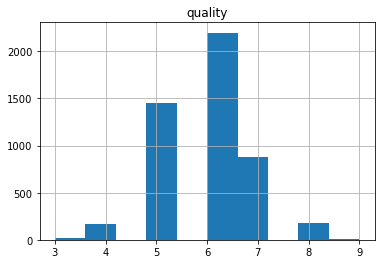

In [14]:
#  a bar plot of “df” to display the class distribution.
df.hist(column='quality')

## Create Data Matrix X and Target y

In [15]:
#Convert the feature and target DataFrame objects into NumPy arrays

# Create separate data frame objects for X (features) and y (target)

X = df.drop(columns='quality')  
y = df['quality'] 

print(X)
print(y)

X = np.asarray(X) # Data Matrix containing all features excluding the target
y = np.asarray(y) # 1D target array

#converting to integer type
y = y.astype(int)


print("Data Matrix (X) Shape: ", X.shape)
print("Label Array (y) Shape: ", y.shape)

print("\nData Matrix (X) Type: ", X.dtype)
print("Label Array (y) Type: ", y.dtype)


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

## Partition the Dataset into Train & Test Subsets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train_lr = X_train.copy()
X_test_lr = X_test.copy()

X_train_plr = X_train.copy()
X_test_plr = X_test.copy()

## Experiment 1  Model: KNN Model

## Standardize the Data

In [17]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


## Model Selection

In [18]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': np.arange(1,50), 'p': [1, 2, 10], 
              'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1_micro', cv=5, verbose=3, n_jobs=-1)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
Best Score: 0.676368
Optimal Hyperparameter Values:  {'n_neighbors': 49, 'p': 1, 'weights': 'distance'}


CPU times: total: 4.28 s
Wall time: 55.4 s


## Train a Model Using Optimal Hyperparameters

In [19]:
%%time

#Use the optimal hyperparameter values to train a new model, as follows.

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

y_train_predicted = knn.predict(X_train)


CPU times: total: 391 ms
Wall time: 380 ms


## Evaluate the Model 

In [20]:
%%time

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)

# The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))


# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))



Training Accuracy:  1.0

Test Accuracy:  0.6683673469387755

No. of correct predictions (Test): 655/980

Confusion Matrix (Test Data):
 [[  0   0   1   2   0   0   0]
 [  0   2  18  14   0   0   0]
 [  0   0 200 104   1   0   0]
 [  0   0  56 347  29   0   0]
 [  0   0   7  70  95   0   0]
 [  0   0   1  16   5  11   0]
 [  0   0   0   1   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.06      0.11        34
           5       0.71      0.66      0.68       305
           6       0.63      0.80      0.70       432
           7       0.73      0.55      0.63       172
           8       1.00      0.33      0.50        33
           9       0.00      0.00      0.00         1

    accuracy                           0.67       980
   macro avg       0.58      0.34      0.37       980
weighted avg       0.69      0.67      0.65       980

CPU times: total: 219 ms

# Experiment 1 Model : Logistic Regression (use batch Gradient Descent)

## Model Selection for Softmax Regression: Hyperparameter Tuning

## Standardize the Data

In [21]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_lr)

# Apply transform to both the training set and the test set.
X_train_lr = scaler.transform(X_train_lr)
X_test_lr = scaler.transform(X_test_lr)

In [22]:
%%time
param_grid_sm = {'solver': [ 'liblinear','newton-cg', 'lbfgs'], 
              'multi_class' : ['multinomial'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000],'C': [0.001,0.01,0.1, 0.5, 1, 10, 15, 50, 100]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid_sm, scoring='f1_micro', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train_lr, y_train)

params_optimal_sm = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_sm)
print("\n")

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Score (F1 score): 0.537264
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 500, 'multi_class': 'multinomial', 'solver': 'newton-cg', 'tol': 0.001}


CPU times: total: 2.77 s
Wall time: 18.7 s


## Train the Optimal Logistic Regression Classifier

In [24]:
lg_reg_sm = LogisticRegression(**params_optimal_sm)

lg_reg_sm.fit(X_train_lr, y_train)

LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial',
                   solver='newton-cg', tol=0.001)

## Evaluate the Optimal Classifier on Test Data

In [25]:
print("No. of Iterations:",lg_reg_sm.n_iter_ )

y_train_predicted_sm = lg_reg_sm.predict(X_train_lr)

train_accuracy_lr = np.mean(y_train_predicted_sm == y_train)
print("\nTraining Accuracy: ", train_accuracy_lr)

y_test_predicted_sm = lg_reg_sm.predict(X_test_lr)
#print(y_test_predict)

accuracy_score_test_sm = np.mean(y_test_predicted_sm == y_test)
print("\nTest Accuracy: ", accuracy_score_test_sm)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted_sm))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted_sm))

No. of Iterations: [16]

Training Accuracy:  0.5431342521694742

Test Accuracy:  0.539795918367347

Test Confusion Matrix:
[[  0   0   1   1   0   1   0]
 [  0   3  13  18   0   0   0]
 [  0   1 157 147   0   0   0]
 [  0   1  72 326  33   0   0]
 [  0   0   8 121  43   0   0]
 [  0   0   1  23   9   0   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.60      0.09      0.15        34
           5       0.62      0.51      0.56       305
           6       0.51      0.75      0.61       432
           7       0.50      0.25      0.33       172
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         1

    accuracy                           0.54       980
   macro avg       0.32      0.23      0.24       980
weighted avg       0.53      0.54      0.51       980



# Experiment 1 Model: Polynomial Logistic Regression (using batch Gradient Descent)

In [29]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_plr)

# Apply transform to both the training set and the test set.
X_train_plr = scaler.transform(X_train_plr)
X_test_plr = scaler.transform(X_test_plr)

## Trying with Degree 2

In [118]:
poly = PolynomialFeatures(degree = 2,  include_bias=False)
X_poly = poly.fit_transform(X_train_plr)
X_poly.shape

(3918, 77)

Training the model

In [119]:
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
pipe.fit(X_train_plr, y_train)
pipe.score(X_test_plr ,y_test)

0.5469387755102041

Evaluating the model with degree 2

In [120]:
y_test_predicted_p = pipe.predict(X_test_lr)
#print(y_test_predict)

accuracy_score_test_p = np.mean(y_test_predicted_p== y_test)
print("\nTest Accuracy: ", accuracy_score_test_p)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted_p))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted_p))


Test Accuracy:  0.5469387755102041

Test Confusion Matrix:
[[  0   2   0   0   0   1   0]
 [  0   6  17  11   0   0   0]
 [  0   4 166 130   4   1   0]
 [  1   1  77 300  51   2   0]
 [  0   0   7  99  63   3   0]
 [  0   0   2  15  15   1   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.46      0.18      0.26        34
           5       0.62      0.54      0.58       305
           6       0.54      0.69      0.61       432
           7       0.47      0.37      0.41       172
           8       0.12      0.03      0.05        33
           9       0.00      0.00      0.00         1

    accuracy                           0.55       980
   macro avg       0.32      0.26      0.27       980
weighted avg       0.53      0.55      0.53       980



## Trying with Degree 3

In [20]:
poly = PolynomialFeatures(degree = 3,  include_bias=False)
X_poly = poly.fit_transform(X_train_plr)
X_poly.shape

(3918, 363)

In [21]:
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
pipe.fit(X_train_plr, y_train)
pipe.score(X_test_plr ,y_test)

C:\Users\adars\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5346938775510204

In [22]:
y_test_predicted_p = pipe.predict(X_test_lr)
#print(y_test_predict)

accuracy_score_test_p = np.mean(y_test_predicted_p== y_test)
print("\nTest Accuracy: ", accuracy_score_test_p)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted_p))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted_p))


Test Accuracy:  0.5346938775510204

Test Confusion Matrix:
[[  0   0   1   1   0   1   0]
 [  0   3  20  10   1   0   0]
 [  0  10 172 115   7   1   0]
 [  0   0  95 283  52   2   0]
 [  0   0   6  96  62   8   0]
 [  0   0   1  14  14   4   0]
 [  0   0   0   1   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.23      0.09      0.13        34
           5       0.58      0.56      0.57       305
           6       0.54      0.66      0.59       432
           7       0.46      0.36      0.40       172
           8       0.25      0.12      0.16        33
           9       0.00      0.00      0.00         1

    accuracy                           0.53       980
   macro avg       0.29      0.26      0.27       980
weighted avg       0.52      0.53      0.52       980



C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Trying with Degree 4

In [23]:
poly = PolynomialFeatures(degree = 4,  include_bias=False)
X_poly = poly.fit_transform(X_train_plr)
X_poly.shape

(3918, 1364)

In [24]:
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
pipe.fit(X_train_plr, y_train)
pipe.score(X_test_plr ,y_test)

C:\Users\adars\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5551020408163265

In [25]:
y_test_predicted_p = pipe.predict(X_test_lr)
#print(y_test_predict)

accuracy_score_test_p = np.mean(y_test_predicted_p== y_test)
print("\nTest Accuracy: ", accuracy_score_test_p)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted_p))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted_p))


Test Accuracy:  0.5551020408163265

Test Confusion Matrix:
[[  0   1   2   0   0   0   0]
 [  0   4  19  10   1   0   0]
 [  0   7 170 125   3   0   0]
 [  0   6  82 309  32   3   0]
 [  0   0  10  98  58   6   0]
 [  0   1   3  16  10   3   0]
 [  0   0   0   1   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.21      0.12      0.15        34
           5       0.59      0.56      0.58       305
           6       0.55      0.72      0.62       432
           7       0.56      0.34      0.42       172
           8       0.25      0.09      0.13        33
           9       0.00      0.00      0.00         1

    accuracy                           0.56       980
   macro avg       0.31      0.26      0.27       980
weighted avg       0.54      0.56      0.54       980



C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Trying with Degree 5 

In [26]:
poly = PolynomialFeatures(degree = 5,  include_bias=False)
X_poly = poly.fit_transform(X_train_plr)
X_poly.shape

(3918, 4367)

In [27]:
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
pipe.fit(X_train_plr, y_train)
pipe.score(X_test_plr ,y_test)

C:\Users\adars\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.536734693877551

In [28]:
y_test_predicted_p = pipe.predict(X_test_lr)
#print(y_test_predict)

accuracy_score_test_p = np.mean(y_test_predicted_p== y_test)
print("\nTest Accuracy: ", accuracy_score_test_p)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted_p))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted_p))


Test Accuracy:  0.536734693877551

Test Confusion Matrix:
[[  1   0   1   1   0   0   0]
 [  0   2  19  12   1   0   0]
 [  0   3 159 138   5   0   0]
 [  0   5  83 312  30   2   0]
 [  0   0   6 112  51   3   0]
 [  0   0   2  20  10   1   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.33      0.50         3
           4       0.20      0.06      0.09        34
           5       0.59      0.52      0.55       305
           6       0.52      0.72      0.61       432
           7       0.52      0.30      0.38       172
           8       0.17      0.03      0.05        33
           9       0.00      0.00      0.00         1

    accuracy                           0.54       980
   macro avg       0.43      0.28      0.31       980
weighted avg       0.52      0.54      0.51       980



C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\adars\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Choosing Degree 2 from above trials and  looking for other hyperparameters

From degree 2 to degree 5 the performance was not improved significantly. All the aacuracy rate were around 40-55%. When the degree was increased it was too much time consuming to tune the hyperparameter. It took me whole night to tune when I used all the parameters together and got no result. The computer got very hot and got hang.  Degree 2 seemed to very efficient and giving similar result as higher degree. Hence I chosed degree 2.

In [30]:
poly = PolynomialFeatures(degree = 2,  include_bias=False)
X_poly = poly.fit_transform(X_train_plr)
X_poly.shape

(3918, 77)

## Hyperparameter Tuning

In [31]:
%%time
param_grid_p2 = {'solver': [ 'newton-cg', 'lbfgs'], 
              'multi_class' : ['multinomial'],
              'tol': [1e-3, 1e-4], 'max_iter':[500, 1000],'C': [0.001,0.01,0.1]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid_p2, scoring='f1_micro', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_poly, y_train)

params_optimal_p2 = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_p2)
print("\n")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Score (F1 score): 0.549260
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 500, 'multi_class': 'multinomial', 'solver': 'newton-cg', 'tol': 0.001}


CPU times: total: 4.11 s
Wall time: 15.1 s


## Train the model with optimal hyperparameter

In [32]:
lr = LogisticRegression(**params_optimal_p2)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
pipe.fit(X_train_plr, y_train)
pipe.score(X_test_plr ,y_test)

0.5489795918367347

## Evaluation of the model

In [34]:
y_test_predicted_p = pipe.predict(X_test_plr)
#print(y_test_predict)
y_train_predicted_p = pipe.predict(X_train_plr)

train_accuracy_p = np.mean(y_train_predicted_p == y_train)
print("\nTraining Accuracy: ", train_accuracy_p)


accuracy_score_test_p = np.mean(y_test_predicted_p== y_test)
print("\nTest Accuracy: ", accuracy_score_test_p)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted_p))


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted_p))




Training Accuracy:  0.5801429300663604

Test Accuracy:  0.5489795918367347

Test Confusion Matrix:
[[  0   2   0   1   0   0   0]
 [  0   6  16  12   0   0   0]
 [  0   3 164 134   3   1   0]
 [  0   0  74 307  48   3   0]
 [  0   0   6 104  60   2   0]
 [  0   0   2  16  14   1   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.55      0.18      0.27        34
           5       0.63      0.54      0.58       305
           6       0.53      0.71      0.61       432
           7       0.48      0.35      0.40       172
           8       0.14      0.03      0.05        33
           9       0.00      0.00      0.00         1

    accuracy                           0.55       980
   macro avg       0.33      0.26      0.27       980
weighted avg       0.54      0.55      0.53       980



# Experiment 2 Subset 1

In [35]:
#Calculate the standard correlation coefficient 
#(also called Pearson’s r) between the
#binary target Y and all features.

df_main.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

# Subset 1

## Create Data Matrix X and Target y

In [36]:
x_data_subset_1 = df_main[['alcohol', 'density', 'chlorides']]
y_data_subset_1 = df_main['quality']

print("Data frame X:")
print(x_data_subset_1)
print("\nData frame y:")
print(y_data_subset_1)


Xs1 = np.asarray(x_data_subset_1) # Data Matrix containing all features excluding the target
ys1 = np.asarray(y_data_subset_1) # 1D target array

print("X Data Shape: ", Xs1.shape)
print("y Data Shape: ", ys1.shape)

print("X Data Type: ", Xs1.dtype)
print("y Data Type: ", ys1.dtype)

Data frame X:
      alcohol  density  chlorides
0         8.8  1.00100      0.045
1         9.5  0.99400      0.049
2        10.1  0.99510      0.050
3         9.9  0.99560      0.058
4         9.9  0.99560      0.058
...       ...      ...        ...
4893     11.2  0.99114      0.039
4894      9.6  0.99490      0.047
4895      9.4  0.99254      0.041
4896     12.8  0.98869      0.022
4897     11.8  0.98941      0.020

[4898 rows x 3 columns]

Data frame y:
0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64
X Data Shape:  (4898, 3)
y Data Shape:  (4898,)
X Data Type:  float64
y Data Type:  int64


## Partition the Dataset into Train & Test Subsets

In [37]:
#Create Train and Test Dataset

X_train_subset_1, X_test_subset_1, y_train_subset_1, y_test_subset_1 = train_test_split(Xs1, ys1, test_size=0.2, random_state=2)

In [38]:
#Create deep copy for other models

X_train_lr_s1 = X_train_subset_1.copy()
X_test_lr_s1 = X_test_subset_1.copy()

X_train_plr_s1 = X_train_subset_1.copy()
X_test_plr_s1 = X_test_subset_1.copy()

## Model  : KNN Model subset 1

## Standardize the data

In [39]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_subset_1)

# Apply transform to both the training set and the test set.
X_train_subset_1 = scaler.transform(X_train_subset_1)
X_test_subset_1 = scaler.transform(X_test_subset_1)

## Model selection

In [40]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid_s1 = {'n_neighbors': np.arange(1,30), 'p': [1, 2, 10], 
              'weights': ["uniform", "distance"]}

knn_clf_s1 = KNeighborsClassifier()

knn_cv_s1 = GridSearchCV(knn_clf_s1, param_grid_s1, scoring='f1_micro', cv=5, verbose=3, n_jobs=-1)
knn_cv_s1.fit(X_train_subset_1, y_train_subset_1)


params_optimal_knn_s1 = knn_cv_s1.best_params_

print("Best Score: %f" % knn_cv_s1.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_s1)
print("\n")

Fitting 5 folds for each of 174 candidates, totalling 870 fits
Best Score: 0.623534
Optimal Hyperparameter Values:  {'n_neighbors': 26, 'p': 2, 'weights': 'distance'}


CPU times: total: 1.03 s
Wall time: 6.97 s


## Train the model with optimal hyperparameter

In [41]:
%%time

#Use the optimal hyperparameter values to train a new model, as follows.

knn_s1 = KNeighborsClassifier(**params_optimal_knn_s1)

knn_s1.fit(X_train_subset_1, y_train_subset_1)

y_train_predicted_s1 = knn_s1.predict(X_train_subset_1)

CPU times: total: 62.5 ms
Wall time: 40.5 ms


## Evaluate the model

In [42]:
%%time

train_accuracy_knn_s1 = np.mean(y_train_predicted_s1 == y_train_subset_1)
print("\nTraining Accuracy: ", train_accuracy_knn_s1)

# The accuracy of the model
test_accuracy_knn_s1 = knn_s1.score(X_test_subset_1, y_test_subset_1)
print("\nTest Accuracy: ", test_accuracy_knn_s1)


# No. of Correct Predictions
y_test_predicted_s1 = knn_s1.predict(X_test_subset_1)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted_s1 == y_test_subset_1), len(y_test_subset_1)))


# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test_subset_1, y_test_predicted_s1))

print("\nClassification Report:")
print(classification_report(y_test_subset_1, y_test_predicted_s1))


Training Accuracy:  0.9946401225114855

Test Accuracy:  0.6316326530612245

No. of correct predictions (Test): 619/980

Confusion Matrix (Test Data):
 [[  0   0   0   3   0   0   0]
 [  0   2   5  25   2   0   0]
 [  0   1 203  94   7   0   0]
 [  1   2  73 315  40   1   0]
 [  0   0  10  73  89   0   0]
 [  0   1   2  15   5  10   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.06      0.10        34
           5       0.69      0.67      0.68       305
           6       0.60      0.73      0.66       432
           7       0.62      0.52      0.56       172
           8       0.91      0.30      0.45        33
           9       0.00      0.00      0.00         1

    accuracy                           0.63       980
   macro avg       0.45      0.32      0.35       980
weighted avg       0.63      0.63      0.62       980

CPU times

# Experiment 2 Model : Logistic Regression (use batch Gradient Descent)

## Standardize the data

In [104]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_lr_s1)

# Apply transform to both the training set and the test set.
X_train_lr_s1 = scaler.transform(X_train_lr_s1)
X_test_lr_s1 = scaler.transform(X_test_lr_s1)

## Tune the hyperparameter

In [45]:
%%time
param_grid_lr_s1 = {'solver': [ 'newton-cg', 'lbfgs'], 
              'multi_class' : ['multinomial'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000],'C': [0.001,0.01,0.1, 0.5, 1, 10, 15, 50, 100]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid_lr_s1, scoring='f1_micro', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train_lr_s1, y_train_subset_1)

params_optimal_lr_s1 = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_lr_s1)
print("\n")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Score (F1 score): 0.503318
Optimal Hyperparameter Values:  {'C': 15, 'max_iter': 500, 'multi_class': 'multinomial', 'solver': 'lbfgs', 'tol': 0.001}


CPU times: total: 6.52 s
Wall time: 34.8 s


## Train the logistic Regression model

In [46]:
lg_reg_lr_s1 = LogisticRegression(**params_optimal_lr_s1)

lg_reg_lr_s1.fit(X_train_lr_s1, y_train_subset_1)

LogisticRegression(C=15, max_iter=500, multi_class='multinomial', tol=0.001)

## Evaluate the model

In [47]:
print("No. of Iterations:",lg_reg_lr_s1.n_iter_ )

y_train_predicted_lr_s1 = lg_reg_lr_s1.predict(X_train_lr_s1)

train_accuracy_lr_s1 = np.mean(y_train_predicted_lr_s1 == y_train_subset_1)
print("\nTraining Accuracy: ", train_accuracy_lr_s1)


y_test_predicted_lr_s1 = lg_reg_lr_s1.predict(X_test_lr_s1)

accuracy_score_test_lr_s1 = np.mean(y_test_predicted_lr_s1 == y_test_subset_1)
print("\nTest Accuracy: ", accuracy_score_test_lr_s1)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_subset_1, y_test_predicted_lr_s1))


print("\nClassification Report:")
print(classification_report(y_test_subset_1, y_test_predicted_lr_s1))

No. of Iterations: [500]

Training Accuracy:  0.501531393568147

Test Accuracy:  0.5081632653061224

Test Confusion Matrix:
[[  0   0   1   2   0   0   0]
 [  0   0   9  25   0   0   0]
 [  0   0 159 146   0   0   0]
 [  0   0  85 306  41   0   0]
 [  0   0  18 121  33   0   0]
 [  0   0   1  20  12   0   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        34
           5       0.58      0.52      0.55       305
           6       0.49      0.71      0.58       432
           7       0.38      0.19      0.25       172
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         1

    accuracy                           0.51       980
   macro avg       0.21      0.20      0.20       980
weighted avg       0.47      0.51      0.47       980



# Experiment 2 Model: Polynomial Logistic Regression (using batch Gradient Descent)

## Standardize the data

In [54]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_plr_s1)

# Apply transform to both the training set and the test set.
X_train_plr_s1 = scaler.transform(X_train_plr_s1)
X_test_plr_s1 = scaler.transform(X_test_plr_s1)


## Trying with degree 2

In [55]:
#create polynomial features
poly_s1 = PolynomialFeatures(degree = 2,  include_bias=False)
X_poly_s1 = poly_s1.fit_transform(X_train_plr_s1)
X_poly_s1.shape

(3918, 9)

In [56]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s1), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s1, y_train_subset_1)
pipe.score(X_test_plr_s1 ,y_test_subset_1)

0.5010204081632653

In [123]:
#Evaluate the model
y_test_predicted_plr_s1 = pipe.predict(X_test_plr_s1)
#print(y_test_predict)

accuracy_score_test_plr_s1 = np.mean(y_test_predicted_plr_s1== y_test_subset_1)
print("\nTest Accuracy: ", accuracy_score_test_plr_s1)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_subset_1, y_test_predicted_plr_s1))


print("\nClassification Report:")
print(classification_report(y_test_subset_1, y_test_predicted_plr_s1))



Test Accuracy:  0.5020408163265306

Test Confusion Matrix:
[[  0   0   1   2   0   0   0]
 [  0   0  10  24   0   0   0]
 [  0   0 155 150   0   0   0]
 [  1   0  83 297  51   0   0]
 [  0   0  16 116  40   0   0]
 [  0   0   1  19  13   0   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        34
           5       0.58      0.51      0.54       305
           6       0.49      0.69      0.57       432
           7       0.38      0.23      0.29       172
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         1

    accuracy                           0.50       980
   macro avg       0.21      0.20      0.20       980
weighted avg       0.46      0.50      0.47       980



## Trying with degree 3

In [60]:
#create polynomial features
poly_s1 = PolynomialFeatures(degree = 3,  include_bias=False)
X_poly_s1 = poly_s1.fit_transform(X_train_plr_s1)
X_poly_s1.shape

(3918, 19)

In [61]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s1), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s1, y_train_subset_1)
pipe.score(X_test_plr_s1 ,y_test_subset_1)

0.49795918367346936

## Trying with degree 4

In [62]:
#create polynomial features
poly_s1 = PolynomialFeatures(degree = 4,  include_bias=False)
X_poly_s1 = poly_s1.fit_transform(X_train_plr_s1)
X_poly_s1.shape

(3918, 34)

In [63]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s1), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s1, y_train_subset_1)
pipe.score(X_test_plr_s1 ,y_test_subset_1)

0.5010204081632653

## Trying with degree 5

In [64]:
#create polynomial features
poly_s1 = PolynomialFeatures(degree = 5,  include_bias=False)
X_poly_s1 = poly_s1.fit_transform(X_train_plr_s1)
X_poly_s1.shape

(3918, 55)

In [65]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s1), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s1, y_train_subset_1)
pipe.score(X_test_plr_s1 ,y_test_subset_1)

0.4959183673469388

## From above trials degree 2 gives the highest test accuracy of 50.20 %. Now lets find other hyperparameters

In [66]:
#create polynomial features
poly_s1 = PolynomialFeatures(degree = 2,  include_bias=False)
X_poly_s1 = poly_s1.fit_transform(X_train_plr_s1)
X_poly_s1.shape

(3918, 9)

## Hyperparameter tuning 

In [67]:
%%time
param_grid_plr_s1 = {'solver': [ 'newton-cg', 'lbfgs'], 
              'multi_class' : ['multinomial'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000],'C': [0.001,0.01,0.1]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid_plr_s1, scoring='f1_micro', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_poly_s1, y_train_subset_1)

params_optimal_plr_s1 = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_plr_s1)
print("\n")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Score (F1 score): 0.495661
Optimal Hyperparameter Values:  {'C': 0.01, 'max_iter': 500, 'multi_class': 'multinomial', 'solver': 'newton-cg', 'tol': 0.001}


CPU times: total: 1.44 s
Wall time: 4.51 s


## Train the model with optimal hyperparameters

In [71]:
# train the model creating pipeline
lr = LogisticRegression(**params_optimal_plr_s1)
pipe = Pipeline([('polynomial_features',poly_s1), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s1, y_train_subset_1)
pipe.score(X_test_plr_s1 ,y_test_subset_1)

0.5071428571428571

## Evaluate the model

In [74]:

y_train_predicted_plr_s1 = pipe.predict(X_train_plr_s1)

train_accuracy_plr_s1 = np.mean(y_train_predicted_plr_s1 == y_train_subset_1)
print("\nTraining Accuracy: ", train_accuracy_plr_s1)


y_test_predicted_plr_s1 = pipe.predict(X_test_plr_s1)

accuracy_score_test_plr_s1 = np.mean(y_test_predicted_plr_s1 == y_test_subset_1)
print("\nTest Accuracy: ", accuracy_score_test_plr_s1)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_subset_1, y_test_predicted_plr_s1))


print("\nClassification Report:")
print(classification_report(y_test_subset_1, y_test_predicted_plr_s1))


Training Accuracy:  0.4936191934660541

Test Accuracy:  0.5071428571428571

Test Confusion Matrix:
[[  0   0   1   2   0   0   0]
 [  0   0  10  24   0   0   0]
 [  0   0 151 154   0   0   0]
 [  0   0  77 309  46   0   0]
 [  0   0  16 119  37   0   0]
 [  0   0   1  19  13   0   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        34
           5       0.59      0.50      0.54       305
           6       0.49      0.72      0.58       432
           7       0.38      0.22      0.28       172
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         1

    accuracy                           0.51       980
   macro avg       0.21      0.20      0.20       980
weighted avg       0.47      0.51      0.47       980



# Experiment 3 Subset 2

## Create Data Matrix X and Target y

In [75]:
x_data_subset_2 = df_main[['alcohol', 'density', 'chlorides','volatile acidity']]
y_data_subset_2 = df_main['quality']

print("Data frame X:")
print(x_data_subset_2)
print("\nData frame y:")
print(y_data_subset_2)


Xs2 = np.asarray(x_data_subset_2) # Data Matrix containing all features excluding the target
ys2 = np.asarray(y_data_subset_2) # 1D target array

print("X Data Shape: ", Xs2.shape)
print("y Data Shape: ", ys2.shape)

print("X Data Type: ", Xs2.dtype)
print("y Data Type: ", ys2.dtype)

Data frame X:
      alcohol  density  chlorides  volatile acidity
0         8.8  1.00100      0.045              0.27
1         9.5  0.99400      0.049              0.30
2        10.1  0.99510      0.050              0.28
3         9.9  0.99560      0.058              0.23
4         9.9  0.99560      0.058              0.23
...       ...      ...        ...               ...
4893     11.2  0.99114      0.039              0.21
4894      9.6  0.99490      0.047              0.32
4895      9.4  0.99254      0.041              0.24
4896     12.8  0.98869      0.022              0.29
4897     11.8  0.98941      0.020              0.21

[4898 rows x 4 columns]

Data frame y:
0       6
1       6
2       6
3       6
4       6
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 4898, dtype: int64
X Data Shape:  (4898, 4)
y Data Shape:  (4898,)
X Data Type:  float64
y Data Type:  int64


## Partition the Dataset into Train & Test Subsets

In [76]:
#Create Train and Test Dataset

X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test_split(Xs2, ys2, test_size=0.2, random_state=2)

In [78]:
#Create deep copy for other models

X_train_lr_s2 = X_train_s2.copy()
X_test_lr_s2 = X_test_s2.copy()

X_train_plr_s2 = X_train_s2.copy()
X_test_plr_s2 = X_test_s2.copy()

## Model  : KNN Model subset 2

In [79]:
# scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_s2)

# Apply transform to both the training set and the test set.
X_train_s2 = scaler.transform(X_train_s2)
X_test_s2 = scaler.transform(X_test_s2)

## Model Selection

In [80]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid_s2 = {'n_neighbors': np.arange(1,80), 'p': [1, 2, 10], 
              'weights': ["uniform", "distance"]}

knn_clf_s2 = KNeighborsClassifier()

knn_cv_s2 = GridSearchCV(knn_clf_s2, param_grid_s2, scoring='f1_micro', cv=5, verbose=3, n_jobs=-1)
knn_cv_s2.fit(X_train_s2, y_train_s2)


params_optimal_knn_s2 = knn_cv_s2.best_params_

print("Best Score: %f" % knn_cv_s2.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_s2)
print("\n")

Fitting 5 folds for each of 474 candidates, totalling 2370 fits
Best Score: 0.658502
Optimal Hyperparameter Values:  {'n_neighbors': 79, 'p': 2, 'weights': 'distance'}


CPU times: total: 1.53 s
Wall time: 19 s


## Train the model with optimal hyperparameter

In [81]:
%%time

#Use the optimal hyperparameter values to train a new model, as follows.

knn_s2 = KNeighborsClassifier(**params_optimal_knn_s2)

knn_s2.fit(X_train_s2, y_train_s2)

y_train_predicted_s2 = knn_s2.predict(X_train_s2)

CPU times: total: 141 ms
Wall time: 126 ms


In [82]:
%%time

train_accuracy_knn_s2 = np.mean(y_train_predicted_s2 == y_train_s2)
print("\nTraining Accuracy: ", train_accuracy_knn_s2)

# The accuracy of the model
test_accuracy_knn_s2 = knn_s2.score(X_test_s2, y_test_s2)
print("\nTest Accuracy: ", test_accuracy_knn_s2)


# No. of Correct Predictions
y_test_predicted_s2 = knn_s2.predict(X_test_s2)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted_s2 == y_test_s2), len(y_test_s2)))


# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test_s2, y_test_predicted_s2))

print("\nClassification Report:")
print(classification_report(y_test_s2, y_test_predicted_s2))


Training Accuracy:  0.9989790709545686

Test Accuracy:  0.6510204081632653

No. of correct predictions (Test): 638/980

Confusion Matrix (Test Data):
 [[  0   0   1   2   0   0   0]
 [  0   2  15  16   1   0   0]
 [  0   0 192 112   1   0   0]
 [  0   0  55 347  30   0   0]
 [  0   0   4  81  87   0   0]
 [  0   0   0  16   7  10   0]
 [  0   0   0   1   0   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.06      0.11        34
           5       0.72      0.63      0.67       305
           6       0.60      0.80      0.69       432
           7       0.69      0.51      0.58       172
           8       1.00      0.30      0.47        33
           9       0.00      0.00      0.00         1

    accuracy                           0.65       980
   macro avg       0.57      0.33      0.36       980
weighted avg       0.68      0.65      0.63       980

CPU times

## Experiment 2 Model : Logistic Regression (use batch Gradient Descent) for Subset 2

# Standardize the data

In [83]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_lr_s2)

# Apply transform to both the training set and the test set.
X_train_lr_s2 = scaler.transform(X_train_lr_s2)
X_test_lr_s2 = scaler.transform(X_test_lr_s2)

## Tune the hyperparameter

In [84]:
%%time
param_grid_lr_s2 = {'solver': [ 'newton-cg', 'lbfgs'], 
              'multi_class' : ['multinomial'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000],'C': [0.001,0.01,0.1, 0.5, 1, 10, 15, 50, 100]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid_lr_s2, scoring='f1_micro', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train_lr_s2, y_train_s2)

params_optimal_lr_s2 = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_lr_s2)
print("\n")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Score (F1 score): 0.527820
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 500, 'multi_class': 'multinomial', 'solver': 'newton-cg', 'tol': 0.001}


CPU times: total: 1.64 s
Wall time: 7.78 s


## Train the logistic Regression model

In [85]:
lg_reg_lr_s2 = LogisticRegression(**params_optimal_lr_s2)

lg_reg_lr_s2.fit(X_train_lr_s2, y_train_s2)

LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial',
                   solver='newton-cg', tol=0.001)

## Evaluate the model

In [86]:
print("No. of Iterations:",lg_reg_lr_s2.n_iter_ )


y_train_predicted_lr_s2 = lg_reg_lr_s2.predict(X_train_lr_s2)

train_accuracy_lr_s2 = np.mean(y_train_predicted_lr_s2 == y_train_s2)
print("\nTraining Accuracy: ", train_accuracy_lr_s2)


y_test_predicted_lr_s2 = lg_reg_lr_s2.predict(X_test_lr_s2)

accuracy_score_test_lr_s2 = np.mean(y_test_predicted_lr_s2 == y_test_s2)
print("\nTest Accuracy: ", accuracy_score_test_lr_s2)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_s2, y_test_predicted_lr_s2))


print("\nClassification Report:")
print(classification_report(y_test_s2, y_test_predicted_lr_s2))

No. of Iterations: [16]

Training Accuracy:  0.5308831036242981

Test Accuracy:  0.5306122448979592

Test Confusion Matrix:
[[  0   0   1   2   0   0   0]
 [  0   1  14  19   0   0   0]
 [  0   0 158 147   0   0   0]
 [  1   0  70 326  35   0   0]
 [  0   0   9 128  35   0   0]
 [  0   1   1  21  10   0   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.50      0.03      0.06        34
           5       0.62      0.52      0.57       305
           6       0.51      0.75      0.61       432
           7       0.43      0.20      0.28       172
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         1

    accuracy                           0.53       980
   macro avg       0.29      0.22      0.22       980
weighted avg       0.51      0.53      0.49       980



## Experiment 2 Model: Polynomial Logistic Regression (using batch Gradient Descent) for Subset 2

## Standardize the data

In [197]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_plr_s2)

# Apply transform to both the training set and the test set.
X_train_plr_s2 = scaler.transform(X_train_plr_s2)
X_test_plr_s2 = scaler.transform(X_test_plr_s2)

## Trying with degree 2

In [198]:
#create polynomial features
poly_s2 = PolynomialFeatures(degree = 2,  include_bias=False)
X_poly_s2 = poly_s2.fit_transform(X_train_plr_s2)
X_poly_s2.shape

(3918, 14)

In [199]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s2), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s2, y_train_s2)
pipe.score(X_test_plr_s2 ,y_test_s2)

0.5265306122448979

## Trying with degree 3

In [200]:
#create polynomial features
poly_s2 = PolynomialFeatures(degree = 3,  include_bias=False)
X_poly_s2 = poly_s2.fit_transform(X_train_plr_s2)
X_poly_s2.shape

(3918, 34)

In [201]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s2), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s2, y_train_s2)
pipe.score(X_test_plr_s2 ,y_test_s2)

0.5285714285714286

## Trying with degree 4

In [202]:
#create polynomial features
poly_s2 = PolynomialFeatures(degree = 4,  include_bias=False)
X_poly_s2 = poly_s2.fit_transform(X_train_plr_s2)
X_poly_s2.shape

(3918, 69)

In [203]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s2), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s2, y_train_s2)
pipe.score(X_test_plr_s2 ,y_test_s2)

0.513265306122449

## Trying with degree 5

In [204]:
#create polynomial features
poly_s2 = PolynomialFeatures(degree = 5,  include_bias=False)
X_poly_s2 = poly_s2.fit_transform(X_train_plr_s2)
X_poly_s2.shape

(3918, 125)

In [205]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s2), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s2, y_train_s2)
pipe.score(X_test_plr_s2 ,y_test_s2)

0.49081632653061225

## Trying with degree 6

In [206]:
#create polynomial features
poly_s2 = PolynomialFeatures(degree = 6,  include_bias=False)
X_poly_s2 = poly_s2.fit_transform(X_train_plr_s2)
X_poly_s2.shape

(3918, 209)

In [207]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s2), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s2, y_train_s2)
pipe.score(X_test_plr_s2 ,y_test_s2)

0.42244897959183675

### From above trials degree 3 gives the highest test accuracy of 52.80 %. Now lets find other hyperparameters and Train again with all the parameters

## Hyperparameter tuning

In [87]:
#create polynomial features
poly_s2 = PolynomialFeatures(degree = 3,  include_bias=False)
X_poly_s2 = poly_s2.fit_transform(X_train_plr_s2)
X_poly_s2.shape

(3918, 34)

In [88]:
%%time
param_grid_plr_s2 = {'solver': [ 'newton-cg', 'lbfgs'], 
              'multi_class' : ['multinomial'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000],'C': [0.001,0.01,0.1]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid_plr_s2, scoring='f1_micro', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_poly_s2, y_train_s2)

params_optimal_plr_s2 = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_plr_s2)
print("\n")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Score (F1 score): 0.535733
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 500, 'multi_class': 'multinomial', 'solver': 'newton-cg', 'tol': 0.001}


CPU times: total: 46.4 s
Wall time: 1min 21s


## Train the model with optimal hyperparameters

In [90]:
# train the model creating pipeline
lr = LogisticRegression(**params_optimal_plr_s2)
pipe = Pipeline([('polynomial_features',poly_s2), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s2, y_train_s2)
pipe.score(X_test_plr_s2 ,y_test_s2)

0.5306122448979592

## Evaluate the model

In [91]:

y_train_predicted_plr_s2 = pipe.predict(X_train_plr_s2)

train_accuracy_plr_s2 = np.mean(y_train_predicted_plr_s2 == y_train_s2)
print("\nTraining Accuracy: ", train_accuracy_plr_s2)

y_test_predicted_plr_s2 = pipe.predict(X_test_plr_s2)

accuracy_score_test_plr_s2 = np.mean(y_test_predicted_plr_s2 == y_test_s2)
print("\nTest Accuracy: ", accuracy_score_test_plr_s2)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_s2, y_test_predicted_plr_s2))


print("\nClassification Report:")
print(classification_report(y_test_s2, y_test_predicted_plr_s2))


Training Accuracy:  0.5387953037263911

Test Accuracy:  0.5306122448979592

Test Confusion Matrix:
[[  0   0   1   2   0   0   0]
 [  0   2  14  18   0   0   0]
 [  0   0 168 137   0   0   0]
 [  0   1  75 312  44   0   0]
 [  0   0  10 124  38   0   0]
 [  0   0   1  21  11   0   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.67      0.06      0.11        34
           5       0.62      0.55      0.59       305
           6       0.51      0.72      0.60       432
           7       0.40      0.22      0.29       172
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         1

    accuracy                           0.53       980
   macro avg       0.31      0.22      0.23       980
weighted avg       0.51      0.53      0.50       980



# Experiment 2 Subset 3

## Create Data Matrix X and Target y

In [228]:
x_data_subset_3 = df_main[['alcohol', 'volatile acidity', 'density', 'chlorides', 'total sulfur dioxide','fixed acidity']]
y_data_subset_3 = df_main['quality']

print("Data frame X:")
print(x_data_subset_3)
print("\nData frame y:")
print(y_data_subset_3)


Xs3 = np.asarray(x_data_subset_3) # Data Matrix containing all features excluding the target
ys3 = np.asarray(y_data_subset_3) # 1D target array

print("X Data Shape: ", Xs3.shape)
print("y Data Shape: ", ys3.shape)

print("X Data Type: ", Xs3.dtype)
print("y Data Type: ", ys3.dtype)

Data frame X:
      alcohol  volatile acidity  density  chlorides  total sulfur dioxide  \
0         8.8              0.27  1.00100      0.045                 170.0   
1         9.5              0.30  0.99400      0.049                 132.0   
2        10.1              0.28  0.99510      0.050                  97.0   
3         9.9              0.23  0.99560      0.058                 186.0   
4         9.9              0.23  0.99560      0.058                 186.0   
...       ...               ...      ...        ...                   ...   
4893     11.2              0.21  0.99114      0.039                  92.0   
4894      9.6              0.32  0.99490      0.047                 168.0   
4895      9.4              0.24  0.99254      0.041                 111.0   
4896     12.8              0.29  0.98869      0.022                 110.0   
4897     11.8              0.21  0.98941      0.020                  98.0   

      fixed acidity  
0               7.0  
1               6

In [229]:
#Create Train and Test Dataset

X_train_s3, X_test_s3, y_train_s3, y_test_s3 = train_test_split(Xs3, ys3, test_size=0.2, random_state=2)

In [230]:
#Create deep copy for other models

X_train_lr_s3 = X_train_s3.copy()
X_test_lr_s3 = X_test_s3.copy()

X_train_plr_s3 = X_train_s3.copy()
X_test_plr_s3 = X_test_s3.copy()

## Model  : KNN Model Subset 3

In [95]:
# scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_s3)

# Apply transform to both the training set and the test set.
X_train_s3 = scaler.transform(X_train_s3)
X_test_s3 = scaler.transform(X_test_s3)

## Model Selection

In [96]:
%%time

warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid_s3 = {'n_neighbors': np.arange(1,70), 'p': [1, 2, 10], 
              'weights': ["uniform", "distance"]}

knn_clf_s3 = KNeighborsClassifier()

knn_cv_s3 = GridSearchCV(knn_clf_s3, param_grid_s3, scoring='f1_micro', cv=5, verbose=3, n_jobs=-1)
knn_cv_s3.fit(X_train_s3, y_train_s3)


params_optimal_knn_s3 = knn_cv_s3.best_params_

print("Best Score: %f" % knn_cv_s3.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn_s3)
print("\n")

Fitting 5 folds for each of 414 candidates, totalling 2070 fits
Best Score: 0.663349
Optimal Hyperparameter Values:  {'n_neighbors': 63, 'p': 1, 'weights': 'distance'}


CPU times: total: 1.83 s
Wall time: 29 s


## Train the model with optimal hyperparameter

In [97]:
%%time

#Use the optimal hyperparameter values to train a new model, as follows.

knn_s3 = KNeighborsClassifier(**params_optimal_knn_s3)

knn_s3.fit(X_train_s3, y_train_s3)

y_train_predicted_s3 = knn_s3.predict(X_train_s3)

CPU times: total: 172 ms
Wall time: 183 ms


In [98]:
%%time

train_accuracy_knn_s3 = np.mean(y_train_predicted_s3 == y_train_s3)
print("\nTraining Accuracy: ", train_accuracy_knn_s3)

# The accuracy of the model
test_accuracy_knn_s3 = knn_s3.score(X_test_s3, y_test_s3)
print("\nTest Accuracy: ", test_accuracy_knn_s3)


# No. of Correct Predictions
y_test_predicted_s3 = knn_s3.predict(X_test_s3)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted_s3 == y_test_s3), len(y_test_s3)))


# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test_s3, y_test_predicted_s3))

print("\nClassification Report:")
print(classification_report(y_test_s3, y_test_predicted_s3))



Training Accuracy:  1.0

Test Accuracy:  0.6581632653061225

No. of correct predictions (Test): 645/980

Confusion Matrix (Test Data):
 [[  0   0   1   1   1   0   0]
 [  0   3  14  17   0   0   0]
 [  0   0 203 102   0   0   0]
 [  0   0  58 337  37   0   0]
 [  0   0   5  75  92   0   0]
 [  0   0   1  16   6  10   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       1.00      0.09      0.16        34
           5       0.72      0.67      0.69       305
           6       0.61      0.78      0.69       432
           7       0.67      0.53      0.60       172
           8       1.00      0.30      0.47        33
           9       0.00      0.00      0.00         1

    accuracy                           0.66       980
   macro avg       0.57      0.34      0.37       980
weighted avg       0.68      0.66      0.64       980

CPU times: total: 109 ms

# Experiment 2 Model : Logistic Regression (use batch Gradient Descent) for Subset 3

## Standardize the data

In [231]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_lr_s3)

# Apply transform to both the training set and the test set.
X_train_lr_s3 = scaler.transform(X_train_lr_s3)
X_test_lr_s3 = scaler.transform(X_test_lr_s3)

## Tune the hyperparameter

In [232]:
%%time
param_grid_lr_s3 = {'solver': [ 'newton-cg', 'lbfgs'], 
              'multi_class' : ['multinomial'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000],'C': [0.001,0.01,0.1, 0.5, 1, 10, 15, 50, 100]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid_lr_s3, scoring='f1_micro', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_train_lr_s3, y_train_s3)

params_optimal_lr_s3 = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_lr_s3)
print("\n")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Score (F1 score): 0.531394
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 500, 'multi_class': 'multinomial', 'solver': 'newton-cg', 'tol': 0.001}


CPU times: total: 2.22 s
Wall time: 12.7 s


## Train the logistic Regression model

In [233]:
lg_reg_lr_s3 = LogisticRegression(**params_optimal_lr_s3)

lg_reg_lr_s3.fit(X_train_lr_s3, y_train_s3)

LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial',
                   solver='newton-cg', tol=0.001)

## Evaluate the model

In [237]:
print("No. of Iterations:",lg_reg_lr_s3.n_iter_ )

y_train_predicted_lr_s3 = lg_reg_lr_s3.predict(X_train_lr_s3)

accuracy_score_train_lr_s3 = np.mean(y_train_predicted_lr_s3 == y_train_s3)
print("\nTrain Accuracy: ", accuracy_score_train_lr_s3)

y_test_predicted_lr_s3 = lg_reg_lr_s3.predict(X_test_lr_s3)

accuracy_score_test_lr_s3 = np.mean(y_test_predicted_lr_s3 == y_test_s3)
print("\nTest Accuracy: ", accuracy_score_test_lr_s3)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_s3, y_test_predicted_lr_s3))


print("\nClassification Report:")
print(classification_report(y_test_s3, y_test_predicted_lr_s3))

No. of Iterations: [15]

Train Accuracy:  0.5334354262378764

Test Accuracy:  0.5357142857142857

Test Confusion Matrix:
[[  0   0   1   2   0   0   0]
 [  0   3  11  20   0   0   0]
 [  0   0 158 147   0   0   0]
 [  0   0  69 329  34   0   0]
 [  0   0   9 128  35   0   0]
 [  0   1   1  21  10   0   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.75      0.09      0.16        34
           5       0.63      0.52      0.57       305
           6       0.51      0.76      0.61       432
           7       0.44      0.20      0.28       172
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         1

    accuracy                           0.54       980
   macro avg       0.33      0.22      0.23       980
weighted avg       0.52      0.54      0.50       980



# Experiment 2 Model: Polynomial Logistic Regression (using batch Gradient Descent) for Subset 3

## Standardize the data

In [243]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train_plr_s3)

# Apply transform to both the training set and the test set.
X_train_plr_s3 = scaler.transform(X_train_plr_s3)
X_test_plr_s3 = scaler.transform(X_test_plr_s3)

##  Trying with degree 2

In [244]:
#create polynomial features
poly_s3 = PolynomialFeatures(degree = 2,  include_bias=False)
X_poly_s3 = poly_s3.fit_transform(X_train_plr_s3)
X_poly_s3.shape

(3918, 27)

In [245]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s3), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s3, y_train_s3)
pipe.score(X_test_plr_s3 ,y_test_s3)

0.536734693877551

## Trying with degree 3

In [246]:
#create polynomial features
poly_s3 = PolynomialFeatures(degree = 3,  include_bias=False)
X_poly_s3 = poly_s3.fit_transform(X_train_plr_s3)
X_poly_s3.shape

(3918, 83)

In [247]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s3), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s3, y_train_s3)
pipe.score(X_test_plr_s3 ,y_test_s3)

0.5255102040816326

## Trying with degree 4

In [248]:
#create polynomial features
poly_s3 = PolynomialFeatures(degree = 4,  include_bias=False)
X_poly_s3 = poly_s3.fit_transform(X_train_plr_s3)
X_poly_s3.shape

(3918, 209)

In [249]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s3), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s3, y_train_s3)
pipe.score(X_test_plr_s3 ,y_test_s3)

0.523469387755102

## Trying with degree 5

In [252]:
#create polynomial features
poly_s3 = PolynomialFeatures(degree = 5,  include_bias=False)
X_poly_s3 = poly_s3.fit_transform(X_train_plr_s3)
X_poly_s3.shape

(3918, 461)

In [251]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s3), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s3, y_train_s3)
pipe.score(X_test_plr_s3 ,y_test_s3)

0.5255102040816326

## Trying with degree 6

In [253]:
#create polynomial features
poly_s3 = PolynomialFeatures(degree = 6,  include_bias=False)
X_poly_s3 = poly_s3.fit_transform(X_train_plr_s3)
X_poly_s3.shape

(3918, 923)

In [254]:
# train the model creating pipeline
lr = LogisticRegression()
pipe = Pipeline([('polynomial_features',poly_s3), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s3, y_train_s3)
pipe.score(X_test_plr_s3 ,y_test_s3)

0.46224489795918366

### From above trials degree 2 gives the highest test accuracy of 53.67 %. Now lets find other hyperparameters and Train the model again with all the parameters

## Hyperparameter tuning

In [102]:
#create polynomial features
poly_s3 = PolynomialFeatures(degree = 2,  include_bias=False)
X_poly_s3 = poly_s3.fit_transform(X_train_plr_s3)
X_poly_s3.shape

(3918, 27)

In [103]:
%%time
param_grid_plr_s3 = {'solver': [ 'newton-cg', 'lbfgs'], 
              'multi_class' : ['multinomial'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000],'C': [0.001,0.01,0.1]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_grid_plr_s3, scoring='f1_micro', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_poly_s3, y_train_s3)

params_optimal_plr_s3 = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_plr_s3)
print("\n")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Score (F1 score): 0.534712
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 1000, 'multi_class': 'multinomial', 'solver': 'newton-cg', 'tol': 0.001}


CPU times: total: 4min 44s
Wall time: 9min 11s


## Train the model with optimal hyperparameters

In [105]:
# train the model creating pipeline
lr = LogisticRegression(**params_optimal_plr_s3)
pipe = Pipeline([('polynomial_features',poly_s3), ('logistic_regression',lr)])
pipe.fit(X_train_plr_s3, y_train_s3)
pipe.score(X_test_plr_s3 ,y_test_s3)

0.539795918367347

## Evaluate the model

In [106]:

y_train_predicted_plr_s3 = pipe.predict(X_train_plr_s3)

train_accuracy_plr_s3 = np.mean(y_train_predicted_plr_s3 == y_train_s3)
print("\nTraining Accuracy: ", train_accuracy_plr_s3)

y_test_predicted_plr_s3 = pipe.predict(X_test_plr_s3)

accuracy_score_test_plr_s3 = np.mean(y_test_predicted_plr_s3 == y_test_s3)
print("\nTest Accuracy: ", accuracy_score_test_plr_s3)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test_s3, y_test_predicted_plr_s3))


print("\nClassification Report:")
print(classification_report(y_test_s3, y_test_predicted_plr_s3))


Training Accuracy:  0.5367534456355283

Test Accuracy:  0.539795918367347

Test Confusion Matrix:
[[  1   0   1   1   0   0   0]
 [  0   3  13  18   0   0   0]
 [  1   1 162 141   0   0   0]
 [  0   0  67 319  46   0   0]
 [  0   0   6 121  44   1   0]
 [  0   0   1  18  14   0   0]
 [  0   0   0   0   1   0   0]]

Classification Report:
              precision    recall  f1-score   support

           3       0.50      0.33      0.40         3
           4       0.75      0.09      0.16        34
           5       0.65      0.53      0.58       305
           6       0.52      0.74      0.61       432
           7       0.42      0.26      0.32       172
           8       0.00      0.00      0.00        33
           9       0.00      0.00      0.00         1

    accuracy                           0.54       980
   macro avg       0.40      0.28      0.30       980
weighted avg       0.53      0.54      0.51       980



# Part B:    Multi-class Classification – Unstructured Data & Analysis of Errors

## Loads the MNIST dataset

In [107]:
import tensorflow as tf
from tensorflow import keras

(X_trainB, y_trainB), (x_testB, y_testB) = tf.keras.datasets.fashion_mnist.load_data()

#Reshape the data: The dimension of the training set is 60000 x 28 x 28 and test
#set is 10000 x 28 x 28.

#Convert to 60000 x 784 size
X_trainB = X_trainB.reshape((X_trainB.shape[0], 784))

#Convert to 10000 x 784 size
x_testB = x_testB.reshape((x_testB.shape[0], 784))

#convert to 1D array
y_testB = y_testB.ravel()
y_trainB = y_trainB.ravel()


## Scale the data

In [108]:
#scale the data using the min-max scaling technique, i.e., by dividing the training
#& test data matrix by 255.0

X_trainB = X_trainB/255.0
x_testB = x_testB/255.0

## Create a List of Class Names

In [109]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Create multiple Lists Containing Samples of the Same Class

In [110]:
samples_MNIST_0 = []
# class index

class_index_0 = 0 

for i in range(len(X_trainB)):
    if(y_trainB[i] == class_index_0):
        samples_MNIST_0.append(X_trainB[i])
        
        
samples_MNIST_1 = []
# class index

class_index_1 = 1 

for i in range(len(X_trainB)):
    if(y_trainB[i] == class_index_1):
        samples_MNIST_1.append(X_trainB[i])
        
samples_MNIST_2 = []
# class index

class_index_2 = 2 

for i in range(len(X_trainB)):
    if(y_trainB[i] == class_index_2):
        samples_MNIST_2.append(X_trainB[i])
        
samples_MNIST_3 = []
# class index

class_index_3 = 3 

for i in range(len(X_trainB)):
    if(y_trainB[i] == class_index_3):
        samples_MNIST_3.append(X_trainB[i])  
        
        
samples_MNIST_4 = []
# class index

class_index_4 = 4 

for i in range(len(X_trainB)):
    if(y_trainB[i] == class_index_4):
        samples_MNIST_4.append(X_trainB[i])
        
        
samples_MNIST_5 = []
# class index

class_index_5 = 5 

for i in range(len(X_trainB)):
    if(y_trainB[i] == class_index_5):
        samples_MNIST_5.append(X_trainB[i])

        
samples_MNIST_6 = []
# class index

class_index_6 = 6 

for i in range(len(X_trainB)):
    if(y_trainB[i] == class_index_6):
        samples_MNIST_6.append(X_trainB[i]) 
        
samples_MNIST_7 = []
# class index

class_index_7 = 7 

for i in range(len(X_trainB)):
    if(y_trainB[i] == class_index_7):
        samples_MNIST_7.append(X_trainB[i])
        
samples_MNIST_8 = []
# class index

class_index_8 = 8 

for i in range(len(X_trainB)):
    if(y_trainB[i] == class_index_8):
        samples_MNIST_8.append(X_trainB[i])
        
        
        
samples_MNIST_9 = []
# class index

class_index_9 = 9 

for i in range(len(X_trainB)):
    if(y_trainB[i] == class_index_9):
        samples_MNIST_9.append(X_trainB[i])
        
        

# Displaying 15 random images from each class

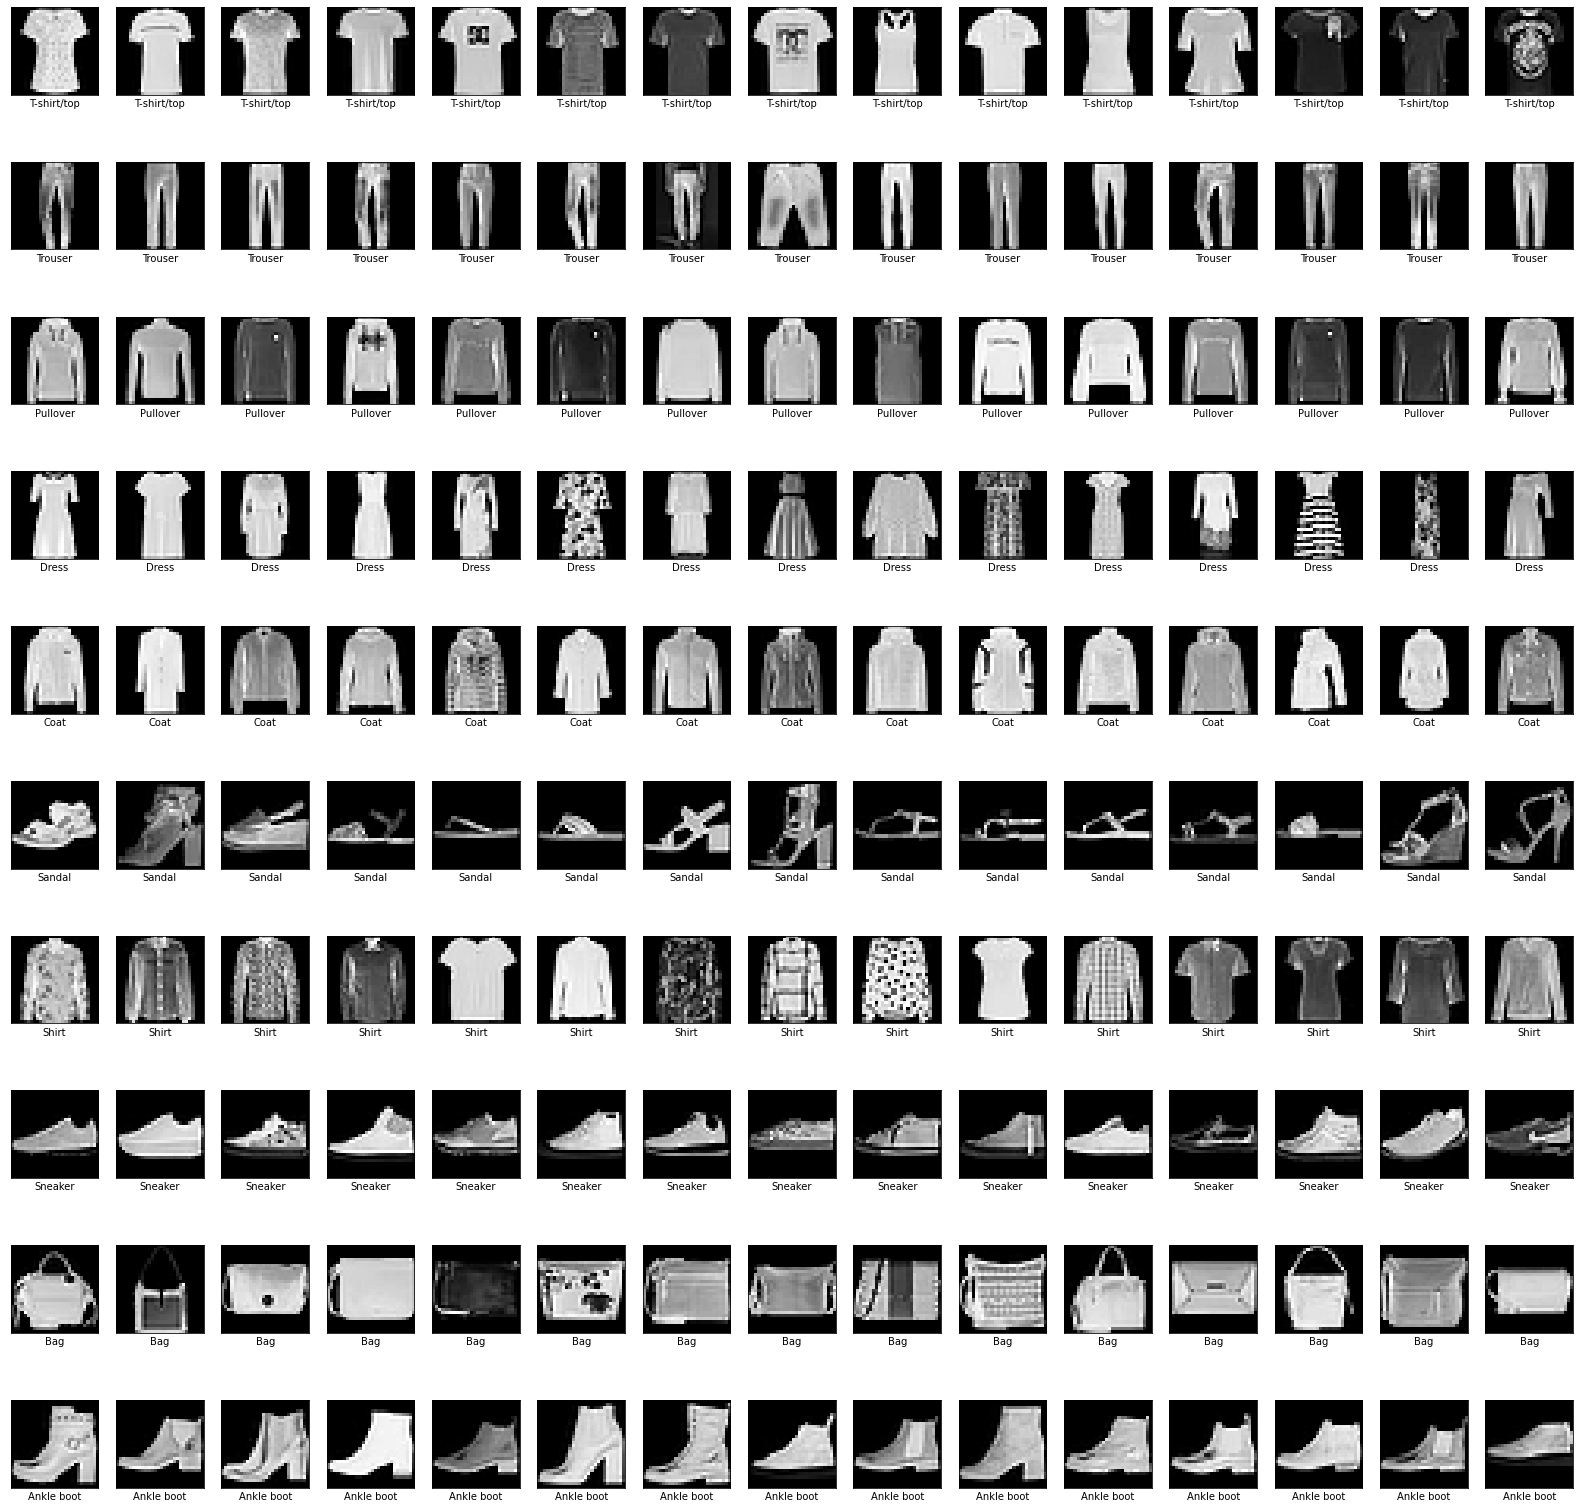

In [7]:
plt.figure(figsize=(28,28))

for i in range(150):
    
        plt.subplot(10,15,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        #radom.randint(a,b) is used to genrate random sample from the pool of same class sample
        
        if i >= 0 and i<15 :
            plt.imshow(samples_MNIST_0[random.randint(0,len(samples_MNIST_0)-1 )].reshape(28,28), cmap = 'gray', interpolation="nearest")
            plt.xlabel(class_names[0])
        
        if i >= 15 and i<30 :
            plt.imshow(samples_MNIST_1[random.randint(0,len(samples_MNIST_1)-1  )].reshape(28,28), cmap = 'gray', interpolation="nearest")
            plt.xlabel(class_names[1])
            
        if i >=  30 and i<45 :
            plt.imshow(samples_MNIST_2[random.randint(0,len(samples_MNIST_2)-1  )].reshape(28,28), cmap = 'gray', interpolation="nearest")  
            plt.xlabel(class_names[2])
                        
        if i >=  45 and i<60 :
            plt.imshow(samples_MNIST_3[random.randint(0,len(samples_MNIST_3)-1  )].reshape(28,28), cmap = 'gray', interpolation="nearest")
            plt.xlabel(class_names[3])
                       
        if i >=  60 and i<75 :
            plt.imshow(samples_MNIST_4[random.randint(0,len(samples_MNIST_4)-1  )].reshape(28,28), cmap = 'gray', interpolation="nearest")
            plt.xlabel(class_names[4])
                       
        if i >=  75 and i<90 :
            plt.imshow(samples_MNIST_5[random.randint(0,len(samples_MNIST_5)-1  )].reshape(28,28), cmap = 'gray', interpolation="nearest")
            plt.xlabel(class_names[5])
                       
        if i >=  90 and i<105 :
            plt.imshow(samples_MNIST_6[random.randint(0,len(samples_MNIST_6)-1  )].reshape(28,28), cmap = 'gray', interpolation="nearest")
            plt.xlabel(class_names[6])
                       
        if i >=  105 and i<120 :
            plt.imshow(samples_MNIST_7[random.randint(0,len(samples_MNIST_7)-1 )].reshape(28,28), cmap = 'gray', interpolation="nearest")
            plt.xlabel(class_names[7])
                       
        if i >=  120 and i<135 :
            plt.imshow(samples_MNIST_8[random.randint(0,len(samples_MNIST_8)-1 )].reshape(28,28), cmap = 'gray', interpolation="nearest")
            plt.xlabel(class_names[8])
                       
        if i >=  135 and i<=150 :
            plt.imshow(samples_MNIST_9[random.randint(0,len(samples_MNIST_9)-1 )].reshape(28,28), cmap = 'gray', interpolation="nearest")
            plt.xlabel(class_names[9])
plt.show()


# Experiment 3

# Model Selection 

# Train the Optimal Logistic Regression Classifier

In [111]:
%%time
param_gridB = {'penalty': ['l1', 'l2', 'elasticnet'],'solver': [ 'newton-cg', 'lbfgs'], 
              'multi_class' : ['multinomial'],
               'max_iter':[500, 1000],'C': [0.01,0.1]}

lg_reg = LogisticRegression()

lg_reg_cv = GridSearchCV(lg_reg, param_gridB, scoring='f1_micro', cv=3, verbose=1, n_jobs=-1)
lg_reg_cv.fit(X_trainB, y_trainB)

params_optimalB = lg_reg_cv.best_params_

print("Best Score (F1 score): %f" % lg_reg_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimalB)
print("\n")


#I had placed the training code here so it is showing error below, later moved down to next block
#Did not have time to retrain at the last moment


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Score (F1 score): 0.857583
Optimal Hyperparameter Values:  {'C': 0.1, 'max_iter': 500, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}




ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got {'C': 0.1, 'max_iter': 500, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}.

# Train the model with optimal hyperparameter

In [112]:
lg_reg_B = LogisticRegression(**params_optimalB)

lg_reg_B.fit(X_trainB, y_trainB)

LogisticRegression(C=0.1, max_iter=500, multi_class='multinomial')

# Evaluate the Optimal Classifier on Test Data

In [115]:
y_train_predictedB = lg_reg_B.predict(X_trainB)

train_accuracyB = np.mean(y_train_predictedB == y_trainB)
print("\nTraining Accuracy: ", train_accuracyB)


y_test_predictedB = lg_reg_B.predict(x_testB)
#print(y_test_predict)

accuracy_score_testB = np.mean(y_test_predictedB == y_testB)
print("\nTest Accuracy: ", accuracy_score_testB)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_testB, y_test_predictedB))


print("\nClassification Report:")
print(classification_report(y_testB, y_test_predictedB))


Training Accuracy:  0.8730166666666667

Test Accuracy:  0.8464

Test Confusion Matrix:
[[811   1  16  52   4   4 102   0  10   0]
 [  3 955   3  27   6   0   4   0   2   0]
 [ 24   3 738  12 125   1  83   1  13   0]
 [ 26  12  15 875  28   0  38   0   6   0]
 [  0   1 110  37 763   0  80   0   9   0]
 [  1   0   0   1   0 924   0  48   4  22]
 [135   1 123  40 103   1 572   0  25   0]
 [  0   0   0   0   0  29   0 942   0  29]
 [  6   1   5  11   2   4  23   6 942   0]
 [  0   1   0   0   0  15   0  41   1 942]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.88      0.85      1000
           4       0.74      0.76      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91 

# Creating list of misclassified Sandal and Sneaker

In [169]:
missclassified_sandal = []
missclassified_sneaker = []

for  i in range(len(x_testB)):
    

        if y_testB[i] == 5 or y_testB[i] == 7:
            
            #find missclas. sandel and append to the list
            if y_testB[i] == 5:
                if y_test_predictedB[i] != 5:
                    missclassified_sandal.append(x_testB[i])
                    
            ##find missclas. sneaker and append to the list       
            if y_testB[i] == 7:
                if y_test_predictedB[i] != 7:
                    missclassified_sneaker.append(x_testB[i])
            

# Finding the predicted probabilities 

In [170]:

predicted_proba_sandal = []
predicted_proba_sneaker = []

#predicted probability of first 24 misclassfied sandals and sneakers will be calculated and added in the list

for l in range (24):
    
    prob_san = lg_reg_B.predict_proba([missclassified_sandal [l]])
    prob_sne = lg_reg_B.predict_proba([missclassified_sneaker [l]])
  
    predicted_proba_sandal.append(prob_san[0][5])
    predicted_proba_sneaker.append(prob_sne[0][7])
    

# Visualize a set of 20 misclassified test samples and their predicted probabilities 

----------------------------------------------------Sandal-------------------------------------------------------------------


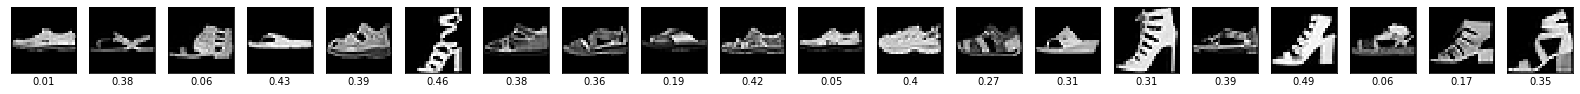

----------------------------------------------------Sneaker------------------------------------------------------------------


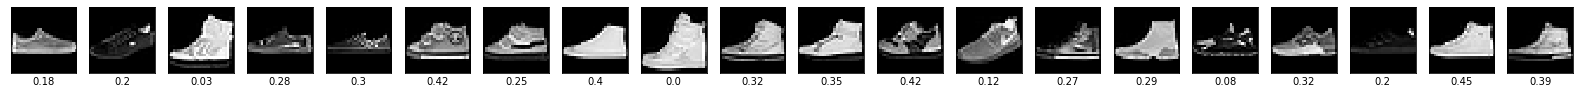

In [173]:
plt.figure(figsize=(28,28))

print("----------------------------------------------------Sandal-------------------------------------------------------------------")

for i in range(20):
    
        plt.subplot(1,20,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(missclassified_sandal[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        plt.xlabel(round(predicted_proba_sandal[i],2))
               
plt.show()



print("----------------------------------------------------Sneaker------------------------------------------------------------------")

plt.figure(figsize=(28,28))

for i in range(20):
    
        plt.subplot(1,20,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(missclassified_sneaker[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        plt.xlabel(round(predicted_proba_sneaker[i],2))
               
plt.show()


# For each set of misclassified images, select  2 images from each class with predicted probabilities less than 0.15 

# Find all misclassified images

In [174]:
# for classes 0 to 9, first create an empty list and then append

missclassified_0 = []
missclassified_1 = []
missclassified_2 = []
missclassified_3 = []
missclassified_4 = []
missclassified_5 = []
missclassified_6 = []
missclassified_7 = []
missclassified_8 = []
missclassified_9 = []

for  i in range(len(x_testB)):
    
            if y_testB[i] == 0:
                if y_test_predictedB[i] != 0:
                    missclassified_0.append(x_testB[i])  
                    
            if y_testB[i] == 1:
                if y_test_predictedB[i] != 1:
                    missclassified_1.append(x_testB[i]) 
                    
            if y_testB[i] == 2:
                if y_test_predictedB[i] != 2:
                    missclassified_2.append(x_testB[i]) 
                    
            if y_testB[i] == 3:
                if y_test_predictedB[i] != 3:
                    missclassified_3.append(x_testB[i])  
                    
            if y_testB[i] == 4:
                if y_test_predictedB[i] != 4:
                    missclassified_4.append(x_testB[i]) 
                    
            if y_testB[i] == 5:
                if y_test_predictedB[i] != 5:
                    missclassified_5.append(x_testB[i]) 
                    
            if y_testB[i] == 6:
                if y_test_predictedB[i] != 6:
                    missclassified_6.append(x_testB[i]) 
                    
            if y_testB[i] == 7:
                if y_test_predictedB[i] != 7:
                    missclassified_7.append(x_testB[i])  
                    
            if y_testB[i] == 8:
                if y_test_predictedB[i] != 8:
                    missclassified_8.append(x_testB[i]) 
                    
            if y_testB[i] == 9:
                if y_test_predictedB[i] != 9:
                    missclassified_9.append(x_testB[i]) 
            

# Find all the probabilities less than 0.15

In [180]:
#empty list to add the probabilities less than 0.15

predicted_proba_0 = []
predicted_proba_1 = []
predicted_proba_2 = []
predicted_proba_3 = []
predicted_proba_4 = []
predicted_proba_5 = []
predicted_proba_6 = []
predicted_proba_7 = []
predicted_proba_8 = []
predicted_proba_9 = []

#predicted probability of first 30 misclassfied classes and added in the list

for l in range (30):
    
    prob_0 = lg_reg_B.predict_proba([missclassified_0 [l]])
    prob_1 = lg_reg_B.predict_proba([missclassified_1 [l]])
    prob_2 = lg_reg_B.predict_proba([missclassified_2 [l]])
    prob_3 = lg_reg_B.predict_proba([missclassified_3 [l]])
    prob_4 = lg_reg_B.predict_proba([missclassified_4 [l]])
    prob_5 = lg_reg_B.predict_proba([missclassified_5 [l]])
    prob_6 = lg_reg_B.predict_proba([missclassified_6 [l]])
    prob_7 = lg_reg_B.predict_proba([missclassified_7 [l]])
    prob_8 = lg_reg_B.predict_proba([missclassified_8 [l]])
    prob_9 = lg_reg_B.predict_proba([missclassified_9 [l]])
    
    if prob_0[0][0]<0.15:
        predicted_proba_0.append(prob_0[0][0])
        
    if prob_1[0][1]<0.15:
        predicted_proba_1.append(prob_1[0][1])
        
    if prob_2[0][2]<0.15:    
        predicted_proba_2.append(prob_2[0][2])
        
    if prob_3[0][3]<0.15:
        predicted_proba_3.append(prob_3[0][3])
        
    if prob_4[0][4]<0.15:   
        predicted_proba_4.append(prob_4[0][4])
        
    if prob_5[0][5]<0.15:
        predicted_proba_5.append(prob_5[0][5])
        
    if prob_6[0][6]<0.15:
        predicted_proba_6.append(prob_6[0][6])
        
    if prob_7[0][7]<0.15:    
        predicted_proba_7.append(prob_7[0][7])
        
    if prob_8[0][8]<0.15:   
        predicted_proba_8.append(prob_8[0][8])
        
    if prob_9[0][9]<0.15:   
        predicted_proba_9.append(prob_9[0][9])

In [203]:
#For example
predicted_proba_0[1]

0.05603823848015314

# Misclassification of Tshirt

Wrongly predicted class is : 6
Wrongly predicted class is : 6


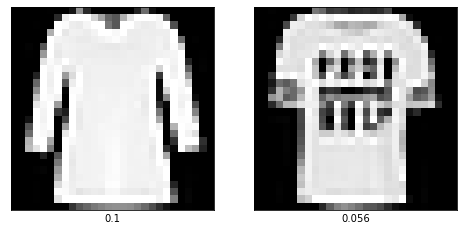

In [226]:

plt.figure(figsize=(8,8))


for i in range(2):
        
        plt.subplot(1,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(round(predicted_proba_0[i],3),fontsize=10)
        plt.imshow(missclassified_0[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        pr = lg_reg_B.predict_proba([missclassified_0[i]])
        
       # finding the class:  the index of highest probaility is equal to the wrongly predicted class                 
        proba = pr[0]
        max = proba[0]
        index = 0
        for i in range(1,len(proba)):
               if proba[i] > max:
                    max = proba[i]
                    index = i
        print(f'Wrongly predicted class is : {index}')
 
        
        
               
plt.show()

# Misclassification of Trouser

Wrongly predicted class is : 3
Wrongly predicted class is : 3


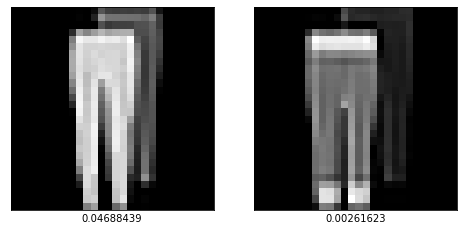

In [225]:

plt.figure(figsize=(8,8))


for i in range(2):
        
        plt.subplot(1,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(round(predicted_proba_1[i],8),fontsize=10)
        plt.imshow(missclassified_1[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        pr = lg_reg_B.predict_proba([missclassified_1[i]])
        
       # finding the class:  the index of highest probaility is equal to the wrongly predicted class                 
        proba = pr[0]
        max = proba[0]
        index = 0
        for i in range(1,len(proba)):
               if proba[i] > max:
                    max = proba[i]
                    index = i
        print(f'Wrongly predicted class is : {index}')
 
        
       
               
plt.show()

# Misclassification of Pullover

Wrongly predicted class is : 6
Wrongly predicted class is : 0


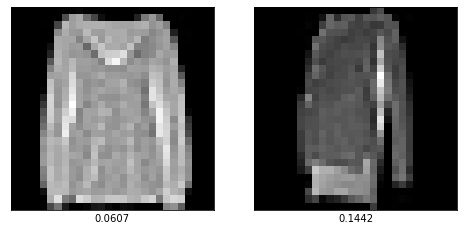

In [224]:

plt.figure(figsize=(8,8))


for i in range(2):
        
        plt.subplot(1,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(round(predicted_proba_2[i],4),fontsize=10)
        plt.imshow(missclassified_2[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        pr = lg_reg_B.predict_proba([missclassified_2[i]])
        
       # finding the class:  the index of highest probaility is equal to the wrongly predicted class                 
        proba = pr[0]
        max = proba[0]
        index = 0
        for i in range(1,len(proba)):
               if proba[i] > max:
                    max = proba[i]
                    index = i
        print(f'Wrongly predicted class is : {index}')
 
        
               
plt.show()

# Misclassification of Dress

Wrongly predicted class is : 4
Wrongly predicted class is : 4


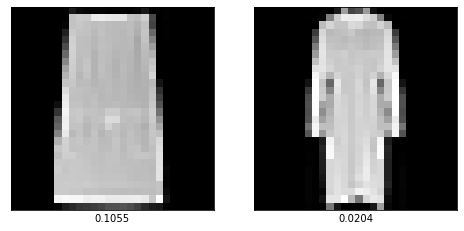

In [216]:

plt.figure(figsize=(8,8))


for i in range(2):
        
        plt.subplot(1,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(round(predicted_proba_3[i],4),fontsize=10)
        plt.imshow(missclassified_3[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        pr = lg_reg_B.predict_proba([missclassified_3[i]])
        
       # finding the class:  the index of highest probaility is equal to the wrongly predicted class                 
        proba = pr[0]
        max = proba[0]
        index = 0
        for i in range(1,len(proba)):
               if proba[i] > max:
                    max = proba[i]
                    index = i
        print(f'Wrongly predicted class is : {index}')
 
        
               
plt.show()

# Misclassification of Coat

Wrongly predicted class is : 2
Wrongly predicted class is : 2


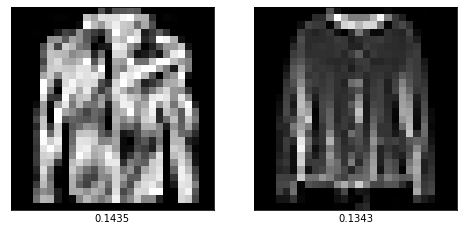

In [217]:

plt.figure(figsize=(8,8))


for i in range(2):
        
        plt.subplot(1,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(round(predicted_proba_4[i],4),fontsize=10)
        plt.imshow(missclassified_4[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        pr = lg_reg_B.predict_proba([missclassified_4[i]])
        
       # finding the class:  the index of highest probaility is equal to the wrongly predicted class                 
        proba = pr[0]
        max = proba[0]
        index = 0
        for i in range(1,len(proba)):
               if proba[i] > max:
                    max = proba[i]
                    index = i
        print(f'Wrongly predicted class is : {index}')
 
        
               
plt.show()

# Misclassification of Sandal

Wrongly predicted class is : 7
Wrongly predicted class is : 7


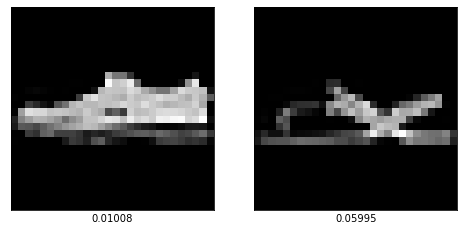

In [218]:

plt.figure(figsize=(8,8))


for i in range(2):
        
        plt.subplot(1,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(round(predicted_proba_5[i],5),fontsize=10)
        plt.imshow(missclassified_5[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        pr = lg_reg_B.predict_proba([missclassified_5[i]])
        
       # finding the class:  the index of highest probaility is equal to the wrongly predicted class                 
        proba = pr[0]
        max = proba[0]
        index = 0
        for i in range(1,len(proba)):
               if proba[i] > max:
                    max = proba[i]
                    index = i
        print(f'Wrongly predicted class is : {index}')
 
        
               
plt.show()

# Misclassification of Shirt

Wrongly predicted class is : 0
Wrongly predicted class is : 4


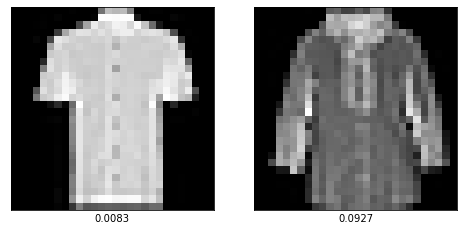

In [219]:

plt.figure(figsize=(8,8))


for i in range(2):
        
        plt.subplot(1,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(round(predicted_proba_6[i],4),fontsize=10)
        plt.imshow(missclassified_6[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        pr = lg_reg_B.predict_proba([missclassified_6[i]])
        
       # finding the class:  the index of highest probaility is equal to the wrongly predicted class                 
        proba = pr[0]
        max = proba[0]
        index = 0
        for i in range(1,len(proba)):
               if proba[i] > max:
                    max = proba[i]
                    index = i
        print(f'Wrongly predicted class is : {index}')
 
        
               
plt.show()

# Misclassification of Sneaker

Wrongly predicted class is : 5
Wrongly predicted class is : 5


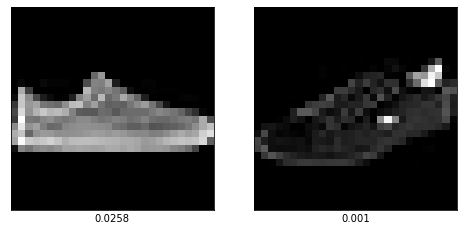

In [220]:

plt.figure(figsize=(8,8))


for i in range(2):
        
        plt.subplot(1,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(round(predicted_proba_7[i],4),fontsize=10)
        plt.imshow(missclassified_7[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        pr = lg_reg_B.predict_proba([missclassified_7[i]])
        
       # finding the class:  the index of highest probaility is equal to the wrongly predicted class                 
        proba = pr[0]
        max = proba[0]
        index = 0
        for i in range(1,len(proba)):
               if proba[i] > max:
                    max = proba[i]
                    index = i
        print(f'Wrongly predicted class is : {index}')
 
        
               
plt.show()

# Misclassification of Bag

Wrongly predicted class is : 6
Wrongly predicted class is : 3


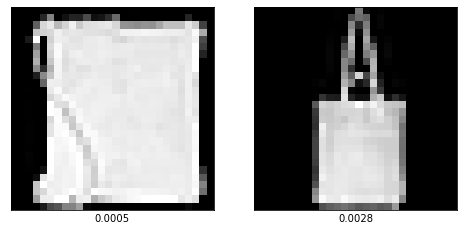

In [221]:

plt.figure(figsize=(8,8))


for i in range(2):
        
        plt.subplot(1,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(round(predicted_proba_8[i],4),fontsize=10)
        plt.imshow(missclassified_8[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        pr = lg_reg_B.predict_proba([missclassified_8[i]])
        
       # finding the class:  the index of highest probaility is equal to the wrongly predicted class                 
        proba = pr[0]
        max = proba[0]
        index = 0
        for i in range(1,len(proba)):
               if proba[i] > max:
                    max = proba[i]
                    index = i
        print(f'Wrongly predicted class is : {index}')
 
        
               
plt.show()

# Misclassification of Ankle boot

Wrongly predicted class is : 7
Wrongly predicted class is : 7


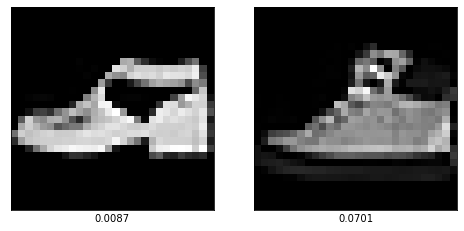

In [223]:

plt.figure(figsize=(8,8))


for i in range(2):
        
        plt.subplot(1,2,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(round(predicted_proba_9[i],4),fontsize=10)
        plt.imshow(missclassified_9[i].reshape(28,28), cmap = 'gray', interpolation="nearest")
        pr = lg_reg_B.predict_proba([missclassified_9[i]])
        
       # finding the class:  the index of highest probaility is equal to the wrongly predicted class                 
        proba = pr[0]
        max = proba[0]
        index = 0
        for i in range(1,len(proba)):
               if proba[i] > max:
                    max = proba[i]
                    index = i
        print(f'Wrongly predicted class is : {index}')
 
        
               
plt.show()